# Clusteriazando usando *Elbow method* e  *silhouette*

- Pode-se utilizar apenas silhouette mas usar o metodo de elbow para econtrar um intervalos de k clusters possíveis de forma vizual e depois aplicar silhouette garante não apenas que parece bom visualmente, mas também apresenta boa separação e definição na prática. Mas pode-se usar tamém apenas silhouette como é feito no outro arquivo.

-  A ideia é utilizar o metodo Elbow para encontrar um faixa de valores possíveis para o número de cluster.
     - Conceito: 
          - O Elbow Method envolve traçar um gráfico da inércia (ou soma das distâncias quadradas entre os pontos e os centros dos clusters) em relação ao número de clusters (k). A inércia tende a diminuir conforme 𝑘 aumenta, pois mais clusters geralmente significam que os pontos estão mais próximos dos centros.
     - Identificação do "Cotovelo": 
          - No gráfico, você busca um ponto onde a taxa de redução da inércia diminui acentuadamente, formando um "cotovelo". Esse ponto é considerado o número ideal de clusters, pois a partir dele, a adição de mais clusters resulta em uma diminuição marginal da inércia.
-  E então aplicar silhouette para identificar o melhor a partir dessa faixa
     - Conceito: 
          - O Silhouette Score mede como os pontos estão agrupados. Para cada ponto, calcula-se a média da distância para os pontos dentro do mesmo cluster e a média da distância para os pontos no cluster mais próximo. O Silhouette Score varia de -1 a 1:

     - Próximo de 1: O ponto está bem agrupado.
     - Próximo de 0: O ponto está no limite entre dois clusters.
     - Próximo de -1: O ponto está mal agrupado (mais próximo de um cluster diferente).
     - Um valor mais alto indica que a separação entre clusters é boa.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Carregar o dataset Iris
iris = datasets.load_iris()

X = iris.data

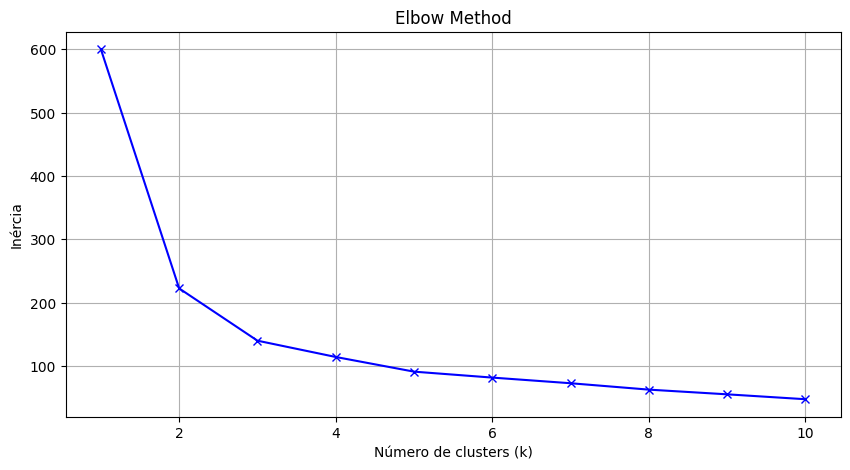

Silhouette Score para 2 clusters: 0.582
Silhouette Score para 3 clusters: 0.460
Silhouette Score para 4 clusters: 0.387
Silhouette Score para 5 clusters: 0.346
Silhouette Score para 6 clusters: 0.317
Silhouette Score para 7 clusters: 0.320
Silhouette Score para 8 clusters: 0.339

Melhor Silhouette Score: 0.582 para 2 clusters
Threshold para outliers: 2.258
Número de outliers detectados: 9


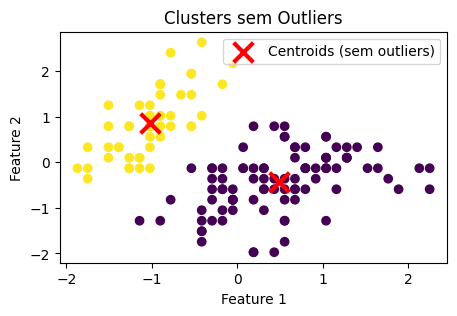

In [12]:

# Pré-processamento: Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------- Elbow Method to determine a range of numbers of clusters -------------------------
inertias = []
k_range = range(1, 11)  # Testa de 1 a 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot do Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# ------------------------- Silhouette Score to determine the best number of clusters -------------------------

# 2. Calcular Silhouette Score para valores de k do Elbow Method
best_k_values = []
best_silhouette_scores = []

# Selecionar um intervalo de k com base na observação do gráfico
k_selected_range = range(2, 9)  # Exemplo: de 2 a 8
for k in k_selected_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    best_k_values.append((k, silhouette_avg))
    print(f"Silhouette Score para {k} clusters: {silhouette_avg:.3f}")

# Identificar o melhor k baseado no Silhouette Score
best_k, best_score = max(best_k_values, key=lambda x: x[1])
print(f"\nMelhor Silhouette Score: {best_score:.3f} para {best_k} clusters")

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
kmeans.fit(X_scaled)

#------------------------- Detecting and Removing Outliers ---------------------------------------------

# 3. Detecção e remoção de outliers
# Calcule as distâncias dos pontos ao centroide
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Defina um limite para identificar outliers (por exemplo, média + 2 desvios padrão)
threshold = np.mean(distances) + 2 * np.std(distances)
print(f"Threshold para outliers: {threshold:.3f}")

# Identifique os índices dos outliers
outlier_indices = np.where(distances > threshold)[0]
print(f"Número de outliers detectados: {len(outlier_indices)}")

# Remova os outliers
X_scaled_no_outliers = np.delete(X_scaled, outlier_indices, axis=0)


# ------------------------- Re-run KMeans without outliers ---------------------------------------------

# Reajuste o KMeans sem outliers
kmeans_no_outliers = KMeans(n_clusters=best_k, n_init=10, random_state=42)
kmeans_no_outliers.fit(X_scaled_no_outliers)


# Plotando os resultados
plt.figure(figsize=(5, 3))
plt.scatter(X_scaled_no_outliers[:, 0], X_scaled_no_outliers[:, 1], c=kmeans_no_outliers.labels_, cmap='viridis')
plt.scatter(kmeans_no_outliers.cluster_centers_[:, 0], kmeans_no_outliers.cluster_centers_[:, 1], 
            marker='x', s=200, linewidths=3, color='r', label='Centroids (sem outliers)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clusters sem Outliers')
plt.show()


Silhouette Score para 2 clusters: 0.582
Silhouette Score para 3 clusters: 0.460
Silhouette Score para 4 clusters: 0.387
Silhouette Score para 5 clusters: 0.346
Silhouette Score para 6 clusters: 0.317
Silhouette Score para 7 clusters: 0.320
Silhouette Score para 8 clusters: 0.339
Silhouette Score para 9 clusters: 0.342
Silhouette Score para 10 clusters: 0.352
Melhores Silhouette Scores e seus respectivos k:
Silhouette Score: 0.582 para 2 clusters
Silhouette Score: 0.460 para 3 clusters
Silhouette Score: 0.387 para 4 clusters


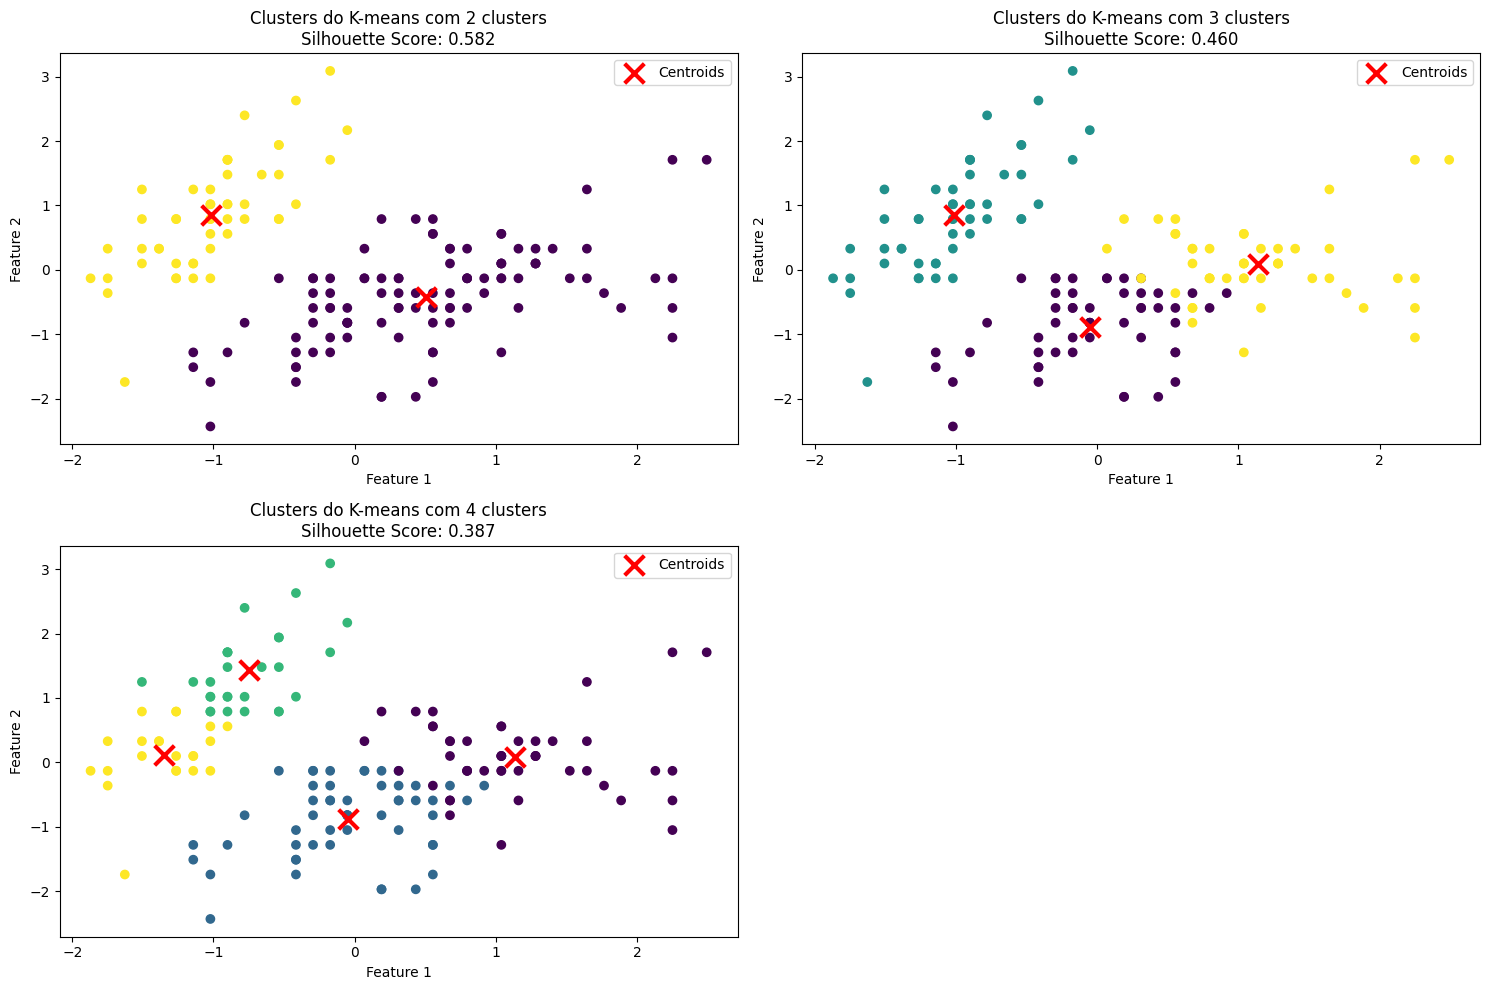

In [18]:
# Pré-processamento: Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k_values = []
best_silhouette_scores = []

# Testar diferentes valores de k
k_range = range(2, 11)  # Testa de 2 a 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Define n_init explicitamente
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score para {k} clusters: {silhouette_avg:.3f}")
    
    # Armazena os melhores k e seus scores
    if len(best_k_values) < 3:
        best_k_values.append((k, silhouette_avg))
        best_k_values.sort(key=lambda x: x[1], reverse=True)
    elif silhouette_avg > best_k_values[-1][1]:
        best_k_values[-1] = (k, silhouette_avg)
        best_k_values.sort(key=lambda x: x[1], reverse=True)

print("Melhores Silhouette Scores e seus respectivos k:")
for k, score in best_k_values:
    print(f"Silhouette Score: {score:.3f} para {k} clusters")

# Plotar os clusters para os 3 melhores k
plt.figure(figsize=(15, 10))

for i, (k, _) in enumerate(best_k_values):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker='x', s=200, linewidths=3, color='r', label='Centroids')
    plt.title(f'Clusters do K-means com {k} clusters\nSilhouette Score: {best_k_values[i][1]:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()
